In this file we look closer at the IEDB Data.
The csv was created with the following filters:

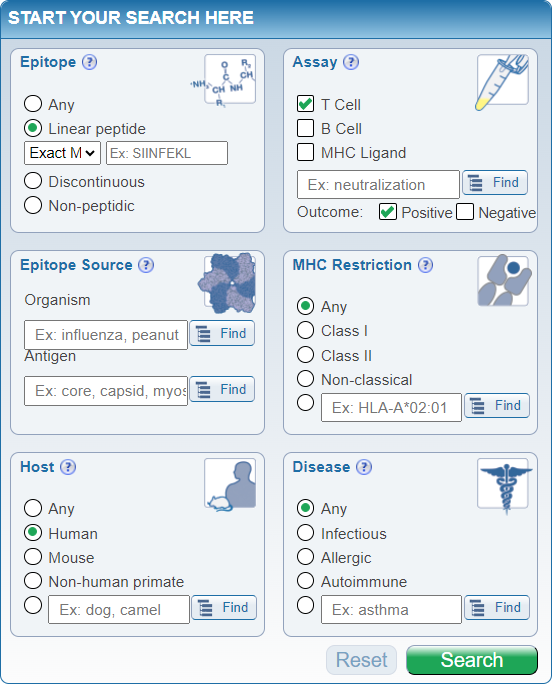

After loading this additional filter was set:

![alt text](image-1.png)

The data has many columns, not all of them are interesting for our purposes.
Now the data get's loaded and the columns are seperated in three lists. One list with interesting properties, one with properties which might be interesting and the last one with properties which is neither in list one or two.

In [1]:
import pandas as pd

df = pd.read_csv("../../data/IEDB/receptor_table_export_positive_only_1711549960.csv")

/tmp/ipykernel_71119/3850774732.py:3: DtypeWarning: Columns (2,10,12,13,14,15,16,17,19,20,21,22,23,24,29,30,35,36,41,42,43,44,45,46,47,48,49,50,51,52,53,58,59,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/IEDB/receptor_table_export_positive_only_1711549960.csv")


now checkout the dataframe

In [2]:
print(df.head())
print(df.info())

                Receptor - Group IRI  Receptor - IEDB Receptor ID  \
0    http://www.iedb.org/receptor/47                           57   
1    http://www.iedb.org/receptor/47                           57   
2  http://www.iedb.org/receptor/8493                           58   
3  http://www.iedb.org/receptor/8493                           58   
4  http://www.iedb.org/receptor/8493                           58   

  Receptor - Reference Name Receptor - Type  \
0                    KK50.4       alphabeta   
1                    KK50.4       alphabeta   
2                      LC13       alphabeta   
3                      LC13       alphabeta   
4                      LC13       alphabeta   

                    Reference - IEDB IRI                  Epitope - IEDB IRI  \
0  http://www.iedb.org/reference/1004539   http://www.iedb.org/epitope/69921   
1  http://www.iedb.org/reference/1004539   http://www.iedb.org/epitope/69921   
2  http://www.iedb.org/reference/1004580  http://www.iedb.org/

In [3]:
interestingProperties = [
  "Receptor - IEDB Receptor ID",
  "Epitope - Name",
  "Epitope - Source Organism",
  "Assay - Type", 
  "Assay - MHC Allele Names", # maybe interesting because EPIC Trace does something with Allele -> https://github.com/DaniTheOrange/EPIC-TRACE/blob/main/src/construct_long.py
  "Chain 1 - Type",
  "Chain 1 - Curated V Gene",
  "Chain 1 - Curated J Gene",
  "Chain 1 - Protein Sequence", # this one is a very long chain
  "Chain 1 - CDR3 Curated", # CDR Sequences also have start and end (curated/calculated properties), which is a integer
  "Chain 1 - CDR1 Curated",
  "Chain 1 - CDR2 Curated",
  "Chain 2 - Type",
  "Chain 2 - Curated V Gene",
  "Chain 2 - Curated J Gene",
  "Chain 2 - Protein Sequence", # this one is a very long chain
  "Chain 2 - CDR3 Curated",
  "Chain 2 - CDR1 Curated",
  "Chain 2 - CDR2 Curated",
  ]

maybeInterestingProperties = [
  "Chain 1 - Nucleotide Sequence", 
  "Chain 1 - Curated D Gene", 
  "Chain 1 - Calculated D Gene", 
  "Chain 2 - Nucleotide Sequence", 
  "Chain 2 - Curated D Gene", 
  "Chain 2 - Calculated D Gene"
  ]

Now the leftover attributes

In [4]:
allProperties = df.columns.to_list()

# Convert lists to sets for easier computation
all_properties_set = set(allProperties)
interesting_properties_set = set(interestingProperties)
maybe_interesting_properties_set = set(maybeInterestingProperties)

# Combine interesting and maybe interesting properties
combined_interesting_set = interesting_properties_set.union(maybe_interesting_properties_set)

# Find the difference
leftoverProperties = list(all_properties_set - combined_interesting_set)

# Print or return the leftover properties
for property in leftoverProperties:
    print(property)
#to be checked (also if CDR Start/End is needed, look at table columns to know what it's meaning):

Chain 2 - CDR2 Start Calculated
Chain 1 - CDR1 End Calculated
Chain 1 - Calculated V Gene
Chain 2 - CDR1 Calculated
Chain 1 - CDR2 Start Curated
Chain 1 - CDR3 Start Curated
Chain 2 - CDR1 Start Calculated
Chain 1 - CDR1 End Curated
Chain 2 - CDR3 Start Curated
Chain 2 - Protein IRI
Chain 1 - CDR2 End Calculated
Chain 2 - Calculated V Gene
Chain 1 - CDR2 Calculated
Receptor - Group IRI
Chain 1 - CDR3 Start Calculated
Chain 1 - CDR1 Calculated
Epitope - IEDB IRI
Chain 1 - CDR1 Start Curated
Chain 1 - Calculated J Gene
Chain 2 - CDR3 End Calculated
Assay - IEDB IDs
Chain 2 - Organism IRI
Epitope - Source Molecule
Chain 1 - CDR3 End Curated
Chain 1 - CDR2 End Curated
Chain 1 - Organism IRI
Chain 2 - Calculated J Gene
Chain 2 - CDR1 End Curated
Chain 2 - CDR2 End Calculated
Chain 2 - CDR1 End Calculated
Chain 1 - CDR3 Calculated
Chain 2 - CDR2 Start Curated
Chain 2 - CDR2 End Curated
Chain 2 - CDR3 Start Calculated
Receptor - Reference Name
Chain 1 - CDR3 End Calculated
Chain 1 - CDR2 Star

Export the most interesting data

In [5]:
df.to_csv('../../data/IEDB/IEDB_positive_only.csv', index=False, columns=interestingProperties)